In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def display_img(img,cmap = None):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

(1367, 1025, 3)

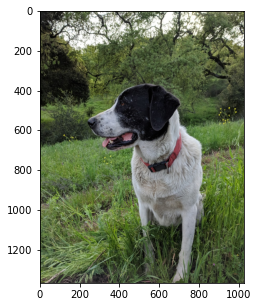

In [7]:
img_1 = cv2.imread("../DATA/sammy.jpg")
img_1_rgb = cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)

display_img(img_1_rgb)
img_1_rgb.shape

(375, 486, 3)

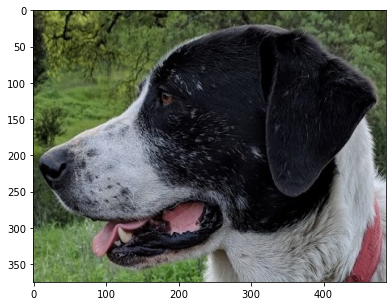

In [6]:
face_img = cv2.imread("../DATA/sammy_face.jpg")
face_img_rgb = cv2.cvtColor(face_img,cv2.COLOR_BGR2RGB)

display_img(face_img_rgb)
face_img_rgb.shape

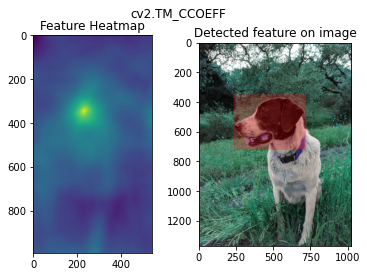

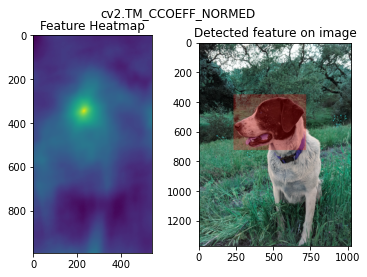

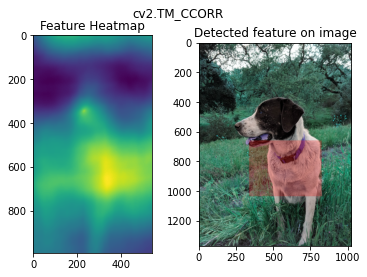

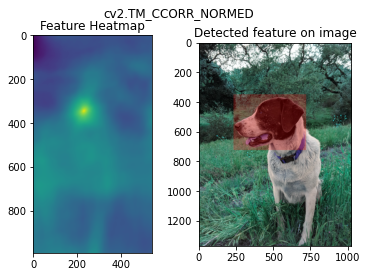

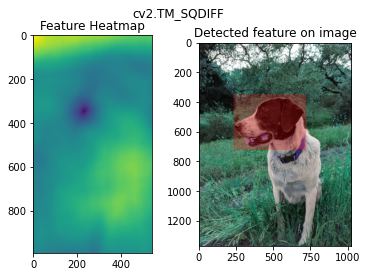

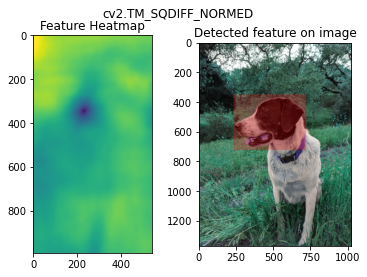

In [24]:
method_list = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for mtd in method_list:
    sammy_img = img_1.copy()
    
    method = eval(mtd)
    
    # Template matching
    result = cv2.matchTemplate(sammy_img,face_img,method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    if mtd in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc
    
    box_h, box_w, channel = face_img.shape
    
    cv2.rectangle(sammy_img,pt1=(top_left),pt2=(top_left[0]+box_w,top_left[1]+box_h),color=(255,0,0),thickness=-1)
    
    alpha = 0.25
    sammy_img = cv2.addWeighted(sammy_img,alpha,img_1,1-alpha,0)
    
    plt.subplot(121)
    plt.imshow(result)
    plt.title("Feature Heatmap")
    
    plt.subplot(122)
    plt.imshow(sammy_img)
    plt.title("Detected feature on image")
    plt.suptitle(mtd)
    
    plt.show()